In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

fish = pd.read_csv('C:\\Users\\aitma\\Downloads\\TP1 Linear and polynomial regression\\fish.csv')
fish.head()

,age,temp,weight,length
0,14,25,100,620
1,28,25,40,1315
2,41,25,78,2120
3,55,25,99,2600
4,69,25,163,3110


<h4>Examinons quelques graphiques pour déterminer comment le poids et la longueur du poisson sont liés à l'âge :</h4>

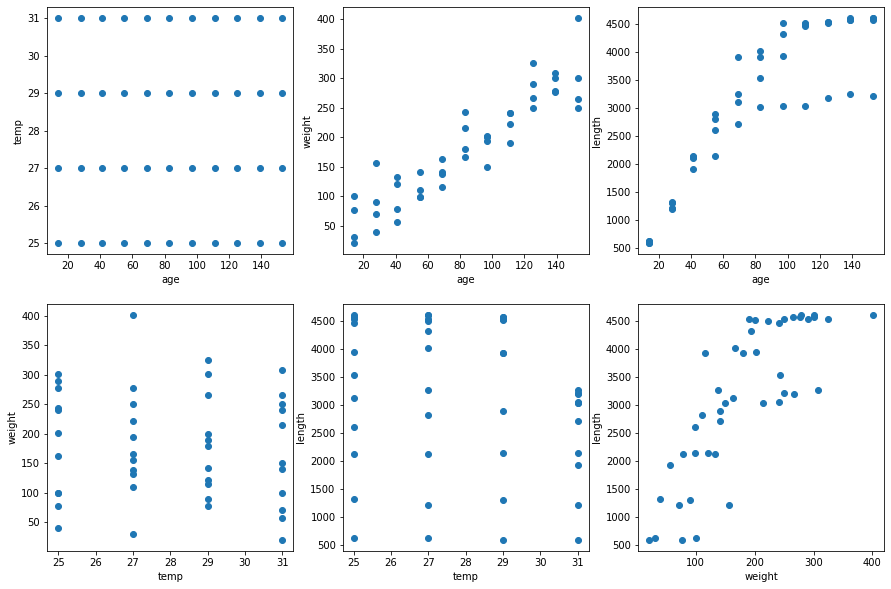

In [2]:
import itertools
import matplotlib.pyplot as plt

# créer une liste de toutes les colonnes que nous envisageons
features = [ 'age', 'temp', 'weight', 'length' ]

# créer toutes les combinaisons de colonnes considérées
combinations = itertools.combinations(features, 2)
#Takes an iterable and a integer. This will create all the unique combination that have r members.
#>>> shapes = ['circle', 'triangle', 'square',]
#>>> result = itertools.combinations(shapes, 2)
#>>> for each in result:
#...     print(each)
#...
# ('circle', 'triangle')
# ('circle', 'square')
# ('triangle', 'square')

# créer une figure et spécifier sa taille
fig = plt.figure(figsize=(15,10))

#parcourir toutes les combinaisons et créer un tracé pour chacune
figure_index = 1
for combination in combinations:
    # ajouter sub plot à la figure
    axs = fig.add_subplot(2,3,figure_index)
    
    # tracer la combinaison de variables
    axs.scatter(fish[combination[0]], fish[combination[1]])
    
    # étiquter les axes
    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
        
    figure_index+=1

    
# afficher 
plt.show()

<h4>Il semble qu'il existe une relation linéaire entre l'âge et le poids. Nous pouvons ajuster une régression linéaire et l'ajouter à l'intrigue. Nous utilisons l'âge comme caractéristique et le poids comme variable cible.</h4>


In [3]:
from sklearn.model_selection import train_test_split

weight = fish['weight']


features = fish['age'].values.reshape(-1, 1)
#In NumPy, -1 in reshape(-1) refers to an unknown dimension that the reshape() function calculates for you.

# créer un train/test split
weight_train, weight_test, weight_target_train, weight_target_test = train_test_split(
    features, weight, test_size=0.4, random_state=42)

<h4>Ajustons maintenant une régression linéaire :</h4>

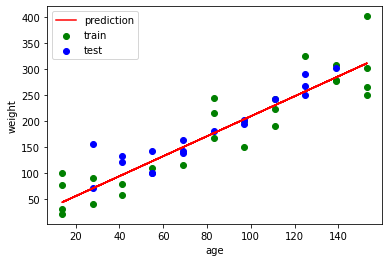

weight = 1.9201086610392861*age + 16.715220383987855


In [10]:
from sklearn.linear_model import LinearRegression

# créer et ajuster une régression linéaire
weight_estimator = LinearRegression()

weight_estimator.fit(weight_train, weight_target_train)

# afficher les valeurs original
plt.scatter(weight_train, weight_target_train, c='green', label='train')
plt.scatter(weight_test, weight_target_test, c='blue', label='test')

# afficher les valeurs prédites
plt.plot(fish['age'], weight_estimator.predict(features),c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('weight')
plt.legend()
plt.show()

# imprimer le modèle qui a été ajusté (la formule de régression)
print("weight = {}*age + {}".format(weight_estimator.coef_[0], weight_estimator.intercept_))



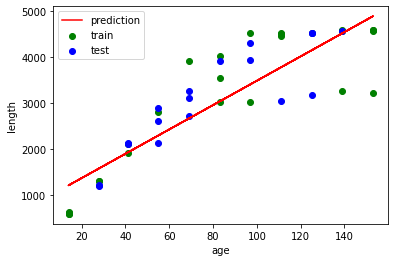

length = 26.45879282386429*age + 840.4859127674258


In [17]:
length = fish['length']

length_train, length_test, length_target_train, length_target_test = train_test_split(
    features, length, test_size=0.4, random_state=42)

length_estimator = LinearRegression()
length_estimator.fit(length_train, length_target_train)

plt.scatter(length_train, length_target_train, c='green', label='train')
plt.scatter(length_test, length_target_test, c='blue', label='test')

plt.plot(fish['age'], length_estimator.predict(features),c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()

print("length = {}*age + {}".format(length_estimator.coef_[0], length_estimator.intercept_))


## Variables polynomiales 

<text>La régression ajustée ne correspond pas vraiment aux données que nous voyons. Il semble que nous ayons besoin d'une régression polynomiale ici. Nous pouvons ajuster une telle régression en utilisant PolynomialFeatures transformer qui génère toutes les combinaisons de caractéristiques possibles pour le polynôme que nous voulons ajuster. Nous pouvons ensuite utiliser à nouveau la régression linéaire pour ajuster notre modèle :</text>

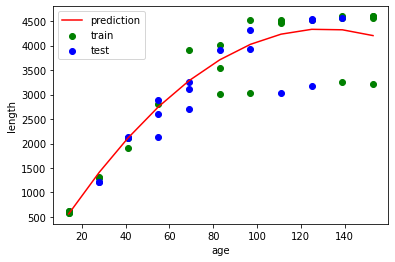

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#perform a polynomial features transform of the dataset
#pipeline do often a number of transformational steps such as encoding categorical variables, 
#feature scaling and normalisation that need to be performed.
#Scikit-learn has built in functions for most of these commonly used transformations in it’s preprocessing package.
transformer = PolynomialFeatures(degree=2, include_bias=False)
estimator = LinearRegression()
pipeline = Pipeline([ ('transformer', transformer), ('estimator', estimator)])
pipeline.fit(length_train, length_target_train)

prediction = pipeline.predict(features) #features is age

plt.scatter(length_train, length_target_train, c='green', label='train')
plt.scatter(length_test, length_target_test, c='blue', label='test')

d = fish[['age']]
#assign to add columns to a dataframe.
d = d.assign(prediction=prediction)
d
d = d.sort_values(by='age')

plt.plot(d['age'], d['prediction'], c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()

print("length = ", end='')
#Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
#l1 = ["eat", "sleep", "repeat"]
#s1 = "geek"
#print (list(enumerate(l1)))
# changing start index to 2 from 0
#print (list(enumerate(s1, 2)))

#Return type: 
#[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
#[(2, 'g'), (3, 'e'), (4, 'e'), (5, 'k')]
for i, f in enumerate(pipeline.named_steps['transformer'].get_feature_names_out(['age'])):
    if i > 0:
        print(" + ", end='')
    print("{}*{}".format(pipeline.named_steps['estimator'].coef_[i], f), end='')
print(" + {}".format(pipeline.named_steps['estimator'].intercept_))